# Detección de Idiomas - Naive Bayes

### Importar librerías

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Cargar el dataset

In [157]:
df = pd.read_csv("dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,19821,19821
unique,19815,20
top,en cet article est partiellement ou en totalit...,Thai
freq,6,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [158]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15856,), (3965,), (15856,), (3965,))

### Convertir texto a Bag of Words

In [159]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [160]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

### Evaluar el modelo

In [161]:
y_pred = nb_model.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9957124842370744

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       199
       Dutch       0.99      1.00      0.99       199
     English       0.97      1.00      0.99       200
    Estonian       1.00      0.98      0.99       200
      French       0.99      1.00      0.99       198
       Hindi       1.00      1.00      1.00       197
  Indonesian       0.99      0.99      0.99       194
      Korean       1.00      0.99      1.00       200
       Latin       0.99      0.97      0.98       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.99      0.99      0.99       199
      Pushto       1.00      1.00      1.00       197
    Romanian       1.00      1.00      1.00       200
     Russian       1.00      0.99      0.99       200
     Spanish       1.00      0.99      1.00       199
     Swedish       1.00      0.99      1.00       197
       Tamil       1.00    

#### Reporte de Clasificación

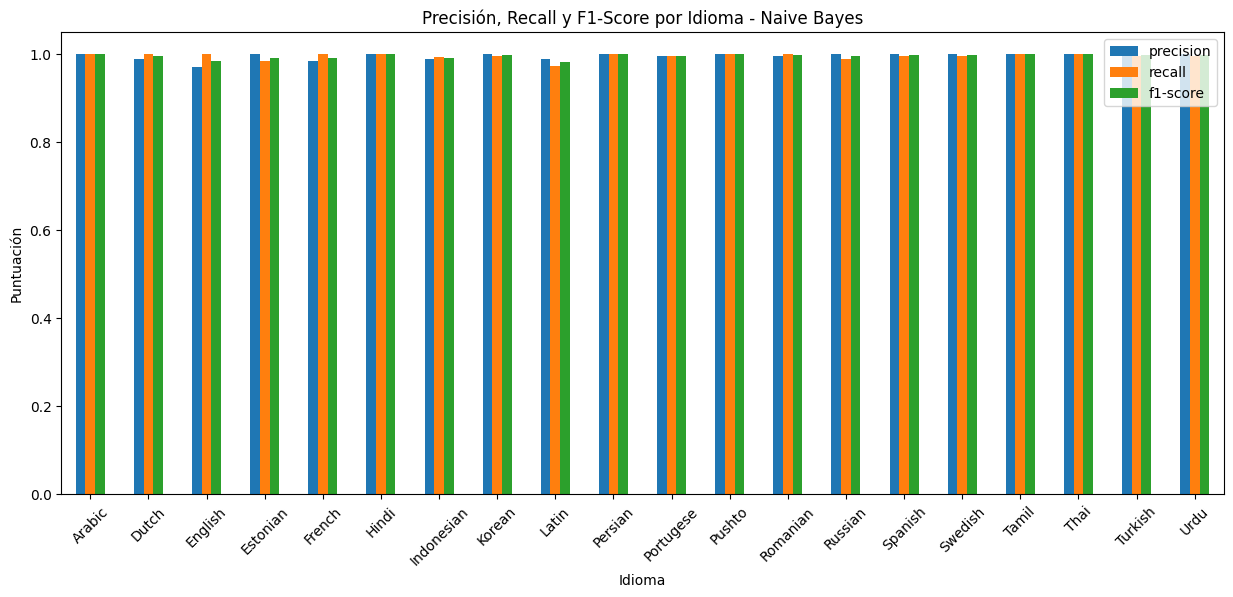

In [162]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T[:-3]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title("Precisión, Recall y F1-Score por Idioma - Naive Bayes")
plt.ylabel("Puntuación")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.savefig("plots/nb_precision_recall_f1.png")
plt.show()

#### Predicciones no acertadas

In [163]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print("Text: ", X_test.iloc[i])
        print("Actual Language: ", y_test.iloc[i])
        print("Predicted Language: ", y_pred[i], "\n")

Text:  inglismaa panga asejuhataja härra ralph kohtunik obadiah konferansjee yokahama tsirkuses sadamaametnik new yorgis 
Actual Language:  Estonian
Predicted Language:  English 

Text:  система католических школ уиноны школа сент-мэри англ st marys primary school школа святого станислава англ st stanislaus elementary school cotter junior high school
Actual Language:  Russian
Predicted Language:  English 

Text:   ideen zu einer reinen phänomenologie und phänomenologischen philosophie erstes buch allgemeine einführung in die reine phänomenologie
Actual Language:  Indonesian
Predicted Language:  Latin 

Text:   al di meola эл ди меола  telarc jazz участник * в исполнении грынькива звучит партия бандуры в некоторых композициях
Actual Language:  Russian
Predicted Language:  Indonesian 

Text:  ”نئی نسل کو دنیاوی مہارت ورثہ میں ملی وقت نہیں تھا یا دفاع کی رغبت نہیں تھی that readiness for war which had characterized the roman landowner disappeared now that ownership was concentrated in a fe

#### Matriz de Confusión

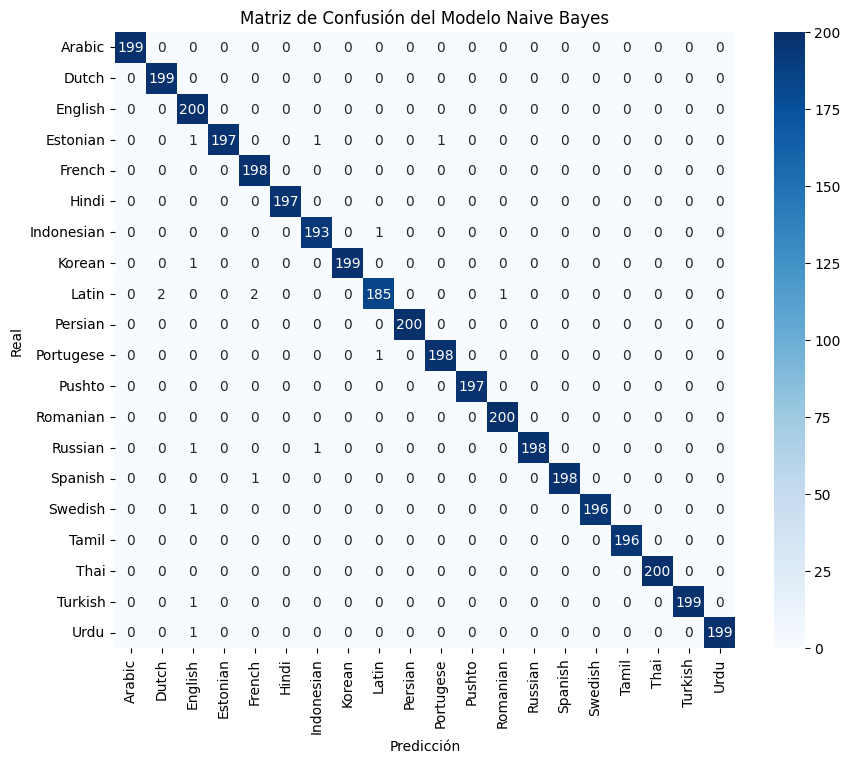

In [164]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Matriz de Confusión del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("plots/nb_confusion_matrix.png")
plt.show()

### Matriz de Confusión Normalizada

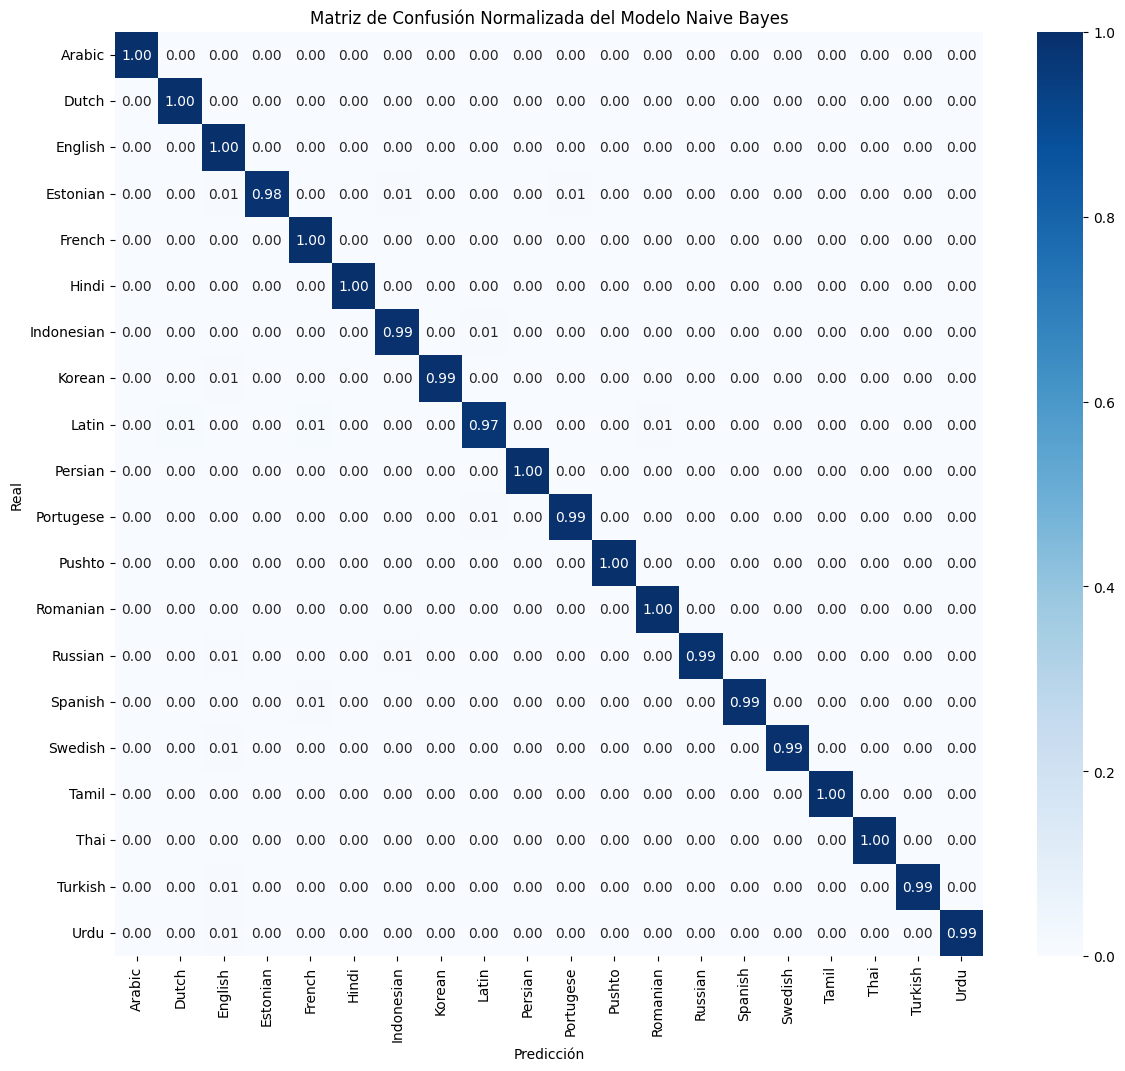

In [165]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Matriz de Confusión Normalizada del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.savefig("plots/nb_confusion_matrix_normalized.png")
plt.show()